# 데이터 표현과 특성 공학

- 범주형 특성 호근 이산형 특성이라고 하는데, 보통 숫자값으로 표현되어있지 않음
- 어떤 특성 안에는 중간값이 없고 카테고리 사이에서도 순서가 없어 표현하지 못할 수도 있음
- 데이터를 어떻게 표현하는지에 따라 성능이 달라질 것임

ex) 제품 브랜드, 색상, 판매분류 등등. 

특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것이 "특성 공학"*Feature engineering*

In [1]:
%matplotlib inline
import os
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt

## 4.1 범주형 변수

In [2]:
data1 = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
data1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


수입이 5만달러를 초과하는지 아닌지에 대한 로지스틱 회귀 분류기를 적용하고 싶은데 workclass, education, sex, occupation은 범주형 특성이므로 이를 바꿔서 적용해야 함

### 4.1.1 원-핫-인코딩 (가변수)

- one-hot-encoding 또는 dummy variable이라고도 불림
- 범주형 변수를 0 또는 1값을 가진 하나 이상의 새로운 특성으로 바꾼 것임.
- 가령 4개의 특성이 있을 때 한 특성은 1이고 나머지는 0으로 표현되는 것

In [3]:
data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [4]:
# 범주형 데이터 문자열 확인하기

print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
print("Original Features:\n", list(data.columns),'\n')

data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성: \n", list(data_dummies.columns))

Original Features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 

범주형 변수만 바뀐 모습을 확인할 수 있다.

In [6]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


훈련 데이터,테스트 데이터를 포함해둔 상태에서 더미로 표현함.

- 더미변환을 데이터를 미리 구분지어놓고 하게 되면 각각 제대로 변환되었는지 일일이 확인해야하는 수고로움이 있기도 하고
- 만약에 훈련데이터와 테스트데이터 상에서 특성 갯수가 다르다면(훈련에는 3개, 테스트에는 4개라면) 학습모델을 적용할수가 없음

### 4.1.2 숫자로 표현된 범주형 특성

- get dummies는 숫자 특성은 모두 연속형이라고 생각하기 때문에 숫자로 쓰여진 연속형은 OneHotEncoder를 사용해야 함

In [9]:
demo_df = pd.DataFrame({"숫자 특성": [0,1,2,1], "범주형 특성":['양말', '여우','양말','상자']})
display(demo_df)

,범주형 특성,숫자 특성
0,양말,0
1,여우,1
2,양말,2
3,상자,1


In [10]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [11]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns = ['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


## 4.2 구간 분할, 이산화 그리고 선형 모델, 트리 모델

- 데이터 특성이나 모델에 따라서 데이터 표현방법이 다름

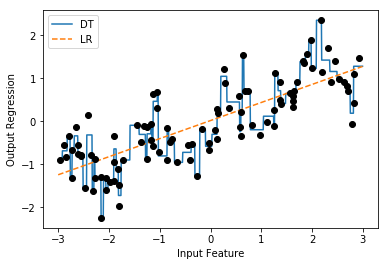

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="DT")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="LR")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Output Regression")
plt.xlabel("Input Feature")
plt.legend(loc="best")

In [13]:
bins = np.linspace(-3, 3, 11)
print("Interval : {}".format(bins))

Interval : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [14]:
which_bin  = np.digitize(X, bins=bins)
print("\n데이터 포인트:\n", X[:5])
print("\n데이터 포인트의 소속 구간:\n", which_bin[:5])


데이터 포인트:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속 구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [16]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


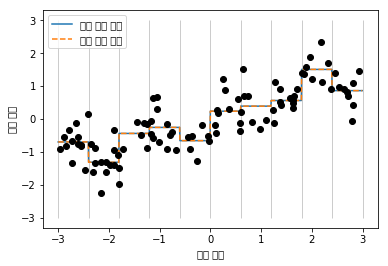

In [17]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

선형 회귀 모델과 디시전 트리가 같은 예측 결과를 나타냄.

선형 회귀는 유연해졌지만 디시전트리는 덜 유연해졌음. 구간으로 나누면서 선형 회귀가 이득을 많이 얻게 되었음

용량이 매우 크고 고차원적인 모델에 대해서 선형모델을 적용할 시에는 구간 분할이 모델 성능을 높이는 데 좋은 방법이 될 수 있음

## 4.3 상호작용과 다항식

- 특성을 나타내는 또다른 방법은 '상호작용'*interaction*과 '다항식'*polynomial*을 추가하는 것

In [20]:
### 선형 모델은 기울기도 학습이 가능하다. 구간으로 분할된 데이터에 원래 특성을 다시 추가시킨다.

X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


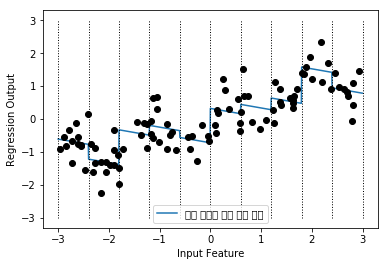

In [21]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = '원본 특성을 더한 선형 회귀')
for bin in bins:
    plt.plot([bin, bin], [-3,3], ':', c='k', linewidth = 1)
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:,0], y, 'o', c='k')

1. 학습된 기울기는 음수, 구간에서 모두 일정
2. x축 특성이 한개이므로 기울기도 하나
3. 각 구간에서 다른 기울기를 가지는게 낫지 않겠나. -> 상호작용 특성을 추가하자. 구간 특성 * 원본 특성

In [25]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


In [28]:
print(X_binned.shape)
print(X.shape)

(100, 10)
(100, 1)


데이터셋은 데이터 포인트가 속한 구간과 / 이 구간에 원본 특성을 곱한 값(product)을 더해서(hstack) 20개의 특성을 가집니다.

이 곱셈 특성을 x축 특성의 복사본(X_product)이라고 생각할 수 있습니다.

이 값은 구간 안에서는 원본 특성이고(원래 원본) 다른 곳에서는 0입니다 (원 핫 인코딩)

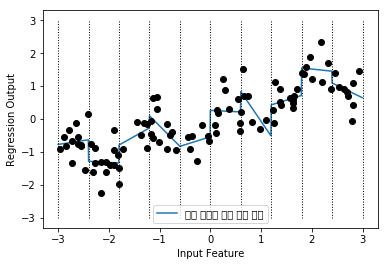

In [29]:
reg = LinearRegression().fit(X_product,y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label = '원본 특성을 곱한 선형 회귀')
for bin in bins:
    plt.plot([bin, bin], [-3,3], ':', c='k', linewidth = 1)
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:,0], y, 'o', c='k')

- 각 구간에서 절편과 기울기가 모두 다르게 구현됨
- 다항식을 추가하는 방안도 있음

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [34]:
print("X 원소:\n{}".format(X[:5]))
print("X_poly 원소:\n{}".format(X_poly[:5]))

X 원소:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소:
[[ -7.52759287e-01   5.66646544e-01  -4.26548448e-01   3.21088306e-01
   -2.41702204e-01   1.81943579e-01  -1.36959719e-01   1.03097700e-01
   -7.76077513e-02   5.84199555e-02]
 [  2.70428584e+00   7.31316190e+00   1.97768801e+01   5.34823369e+01
    1.44631526e+02   3.91124988e+02   1.05771377e+03   2.86036036e+03
    7.73523202e+03   2.09182784e+04]
 [  1.39196365e+00   1.93756281e+00   2.69701700e+00   3.75414962e+00
    5.22563982e+00   7.27390068e+00   1.01250053e+01   1.40936394e+01
    1.96178338e+01   2.73073115e+01]
 [  5.91950905e-01   3.50405874e-01   2.07423074e-01   1.22784277e-01
    7.26822637e-02   4.30243318e-02   2.54682921e-02   1.50759786e-02
    8.92423917e-03   5.28271146e-03]
 [ -2.06388816e+00   4.25963433e+00  -8.79140884e+00   1.81444846e+01
   -3.74481869e+01   7.72888694e+01  -1.59515582e+02   3.29222321e+02
   -6.79478050e+02   1.40236670e+03]]


In [35]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

poly -> 10차원!!!

다항 회귀로 만들어 낼 수 있음

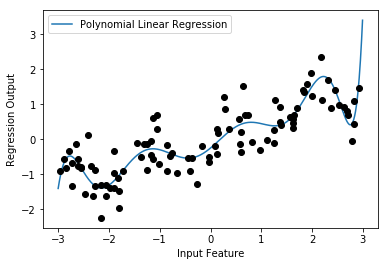

In [36]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = 'Polynomial Linear Regression')
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:,0], y, 'o', c='k')

부드럽게 만들어지지만 데이터가 부족한 영역에서는 민감하게 동작합니다 (과적합 가능성)

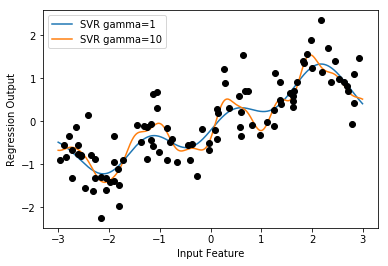

In [37]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:,0], y, 'o', c='k')

SVM에서 감마값 커질수록 데이터에 영향력을 준다.

(gamma는 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정한다. gamma는 가우시안 함수의 표준편차와 관련되어 있는데, 클수록 작은 표준편차를 갖는다. 즉, gamma가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 길어지는 반면, gamma가 낮을수록 짧아진다)

[참고 블로그] [텐진난만](http://bskyvision.com/163)

In [38]:
## 보스턴 셋으로 연습

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
## 차수를 2로 하고 진행

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


105개 - 절편 1개 + 원본 13개 + 두개 중복 13개 + 두개 골라잡은 78개

In [40]:
print("다항 특성 이름:\n{}".format(poly.get_feature_names()))

다항 특성 이름:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [42]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Ridge-상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Ridge-상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))


from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("RF-상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("RF-상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

Ridge-상호작용 특성이 없을 때 점수: 0.621
Ridge-상호작용 특성이 있을 때 점수: 0.753
RF-상호작용 특성이 없을 때 점수: 0.795
RF-상호작용 특성이 있을 때 점수: 0.773


상호작용 특성이 있을때 복잡한 앙상블 메소드의 경우가 더 떨어지는 경우도 있다

## 4.4 일변량 비선형 변환

log, exp, sin 등의 함수를 적용하는 것도 도움이 됨

- 선형 모델이나 신경망의 경우 스케일과 분포에 연관되어있기 때문에 스케일링을 하여 성능을 올리는데 도움을 줄 수 있음
- 특성이 정규분포와 비슷할 때 최고 성능을 낼 수 있음

In [43]:
# 카운트 하는 임시 데이터 만들기
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

In [44]:
X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [46]:
print("특성 출현 횟수:\n{}".format(np.bincount(X[:, 0].astype('int'))))

특성 출현 횟수:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


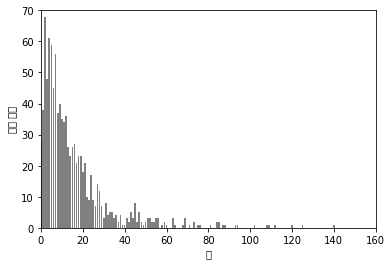

In [47]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

2가 제일 빈번하게 나타나는 것으로 확인했으나 데이터가 치우친 성향이 있음.

In [48]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


알스퀘어 값이 비교적 낮아서 제대로 된 모델링 관계는 아닌것 같다. 로그 스케일로 변환해보자.

In [49]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

In [50]:
X_train_log

array([[ 1.79175947,  0.69314718,  2.56494936],
       [ 0.69314718,  2.77258872,  1.79175947],
       [ 2.83321334,  1.79175947,  1.38629436],
       ..., 
       [ 3.63758616,  2.07944154,  2.89037176],
       [ 2.07944154,  4.4543473 ,  2.48490665],
       [ 1.09861229,  3.04452244,  2.39789527]])

In [51]:
X_train

array([[ 5,  1, 12],
       [ 1, 15,  5],
       [16,  5,  3],
       ..., 
       [37,  7, 17],
       [ 7, 85, 11],
       [ 2, 20, 10]])

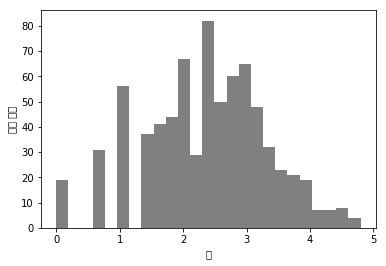

In [52]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")

조금 더 그럴듯한 분포가 완성되었다. 릿지를 적용해봅니다.

In [53]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


## 4.5 특성 자동 선택

차원보다 특성 수 이상이 많아지면 과대적합될 가능성이 높아지기 때문에 유용한 특성만 선택하는게 가장 좋다.

- 일변량 통계
- 모델 기반 선택
- 반복적 선택

### 4.5.1 일변량 통계

개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산

분류에서는 분산분석 사용. 각 특성이 독립적으로 평가된다고 생각

1. 분류/회귀를 테스트(f_classif, f_regression)
2. 계산한 피값에 기초하여 특성을 제외. p값이 높으면 연관성이 적다고 인식
3. 2번을 가능케 하도록 임계값을 조정하는 매개변수를 사용
4. 계산 방법은 다르며 SelectKBest(고정된 k개 특성 선택) / SelectPercentile (지정된 비율만큼 선택)

In [54]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킵니다
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가합니다
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


selected shape -> 절반으로 감소 (selectPercentile : 50%)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x118940748>],
 <a list of 1 Text yticklabel objects>)

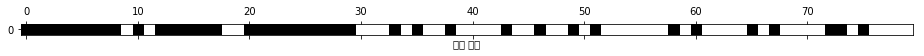

In [55]:
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

대부분 앞의 30개의 원본 특성에서 선택하였으나 완벽히 복원되지는 못했음.

In [56]:
# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


이 경우에는 일부 특성을 사용했을 때 점수가 더 높게 나왔지만 아닐 수도 있다.

실제 분석 시 변수가 너무 많아서 복잡할때 가능

### 4.5.2 모델 기반 특성 선택

"feature _ importances _" 속성을 사용하여 각 특성의 중요도가 담겨진 것을 실행가능

In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")


select.fit(X_train,  y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


threshold = median or mean 등등 표현할 수 있는 방법은 여러가지

([<matplotlib.axis.YTick at 0x11feb8ba8>],
 <a list of 1 Text yticklabel objects>)

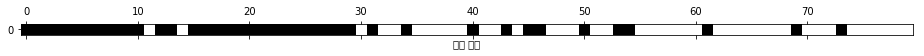

In [61]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [62]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


거의 다 30개의 원본 특성이 선택되었고 성능도 높이 나오는 것으로 확인

### 4.5.3 반복적 특성 선택

- 반복적 특성 선택(IFS) : 특성을 하나도 선택하지 않은 상태로 시작해서 종료 조건에 도달할 때까지 특성 하나씩 추가

- 재귀적 특성 제거(RFE) : 모든 특성을 가지고 시작해서 종료 조건에 도달할 때 까지 특성을 하나씩 제거

([<matplotlib.axis.YTick at 0x11ff31ef0>],
 <a list of 1 Text yticklabel objects>)

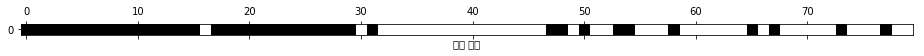

In [63]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# 선택된 특성을 표시합니다
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [65]:
# 로지스틱 회귀 점수도

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("로지스틱 테스트 점수: {:.3f}".format(score))

#선택한 특성 점수도
print("선택특성 테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

로지스틱 테스트 점수: 0.951
선택특성 테스트 점수: 0.951


특성만 잘 선택해도 테스트 점수를 올릴 수 있다. 생각보다 실전에서는 크게 작용을 못하지만 여전히 중요하게 다루어야 할 부분임.

## 4.6 전문가 지식 활용

실제로 분석할 때는 전문가 지식이 특성 선택에 도움을 줄 수 있다.


#### 예시 : 앤디 집 앞의 자전거를 대여할 수 있을까?

In [66]:
citibike = mglearn.datasets.load_citibike()
print("시티 바이크 데이터:\n{}".format(citibike.head()))

시티 바이크 데이터:
starttime
2015-08-01 00:00:00     3.0
2015-08-01 03:00:00     0.0
2015-08-01 06:00:00     9.0
2015-08-01 09:00:00    41.0
2015-08-01 12:00:00    39.0
Freq: 3H, Name: one, dtype: float64


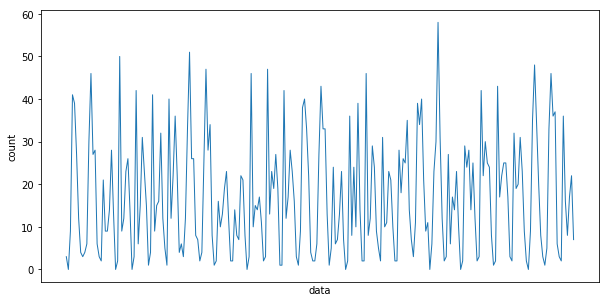

In [84]:
plt.figure(figsize=(10, 5))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ["sun", "mon", "tue","wed", "thu", "fri", "sat"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), 
                                              xticks.strftime(" %m-%d"))]
plt.xticks(xticks.astype(int), xticks_name, rotation="vertical", visible=True)
plt.plot(citibike, linewidth=1)
plt.xlabel("data")
plt.ylabel("count")
plt.show()

In [85]:
# 타깃값 추출 (대여 횟수)
y = citibike.values
# POSIX 시간을 10**9로 나누어 변경
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [88]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듭니다
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눕니다
    X_train, X_test = features[:n_train], features[n_train:]
    # 타깃값도 나눕니다
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="training")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="train prediction")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="test prediction")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("data")
    plt.ylabel("count")

테스트 세트 R^2: -0.04


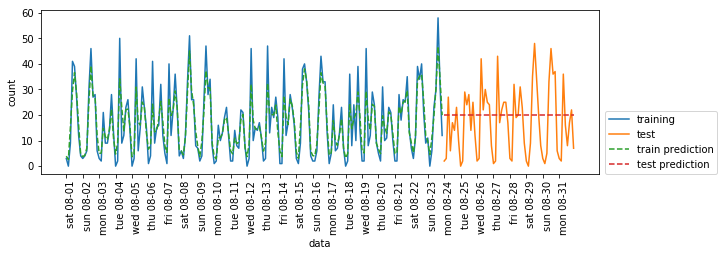

In [89]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

학습이 제대로 안 됐음. 

테스트 세트의 데이터는 모든 데이터셋보다 뒤에 있음. 트리 모델의 경우에는 특성 범위 밖으로 외삽할 수 있는 능력이 없기 때문에 마지막 훈련 테스트셋의 타깃값을 예측으로 그대로 사용하게 되면서 학습이 진행되지 않음

이 상황에서는 전문가의 지식이 필요하게 됨-> 요일과 시간

테스트 세트 R^2: 0.60


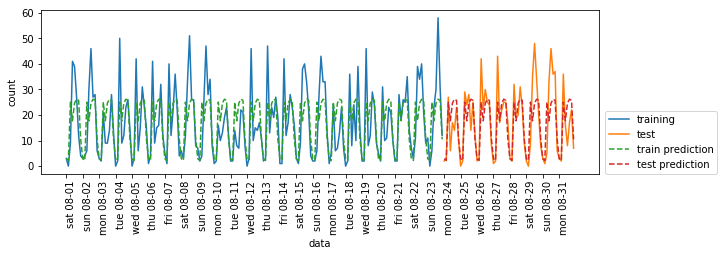

In [90]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

테스트 세트 R^2: 0.84


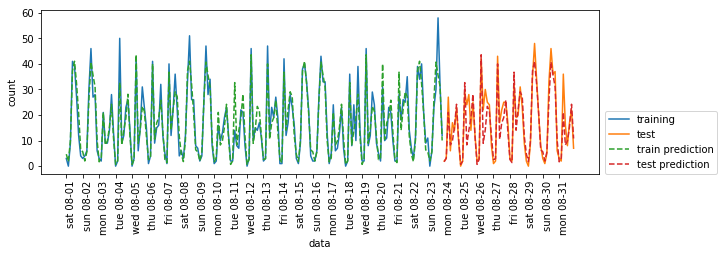

In [91]:
## 시간 + 요일을 함께 추가

X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: 0.13


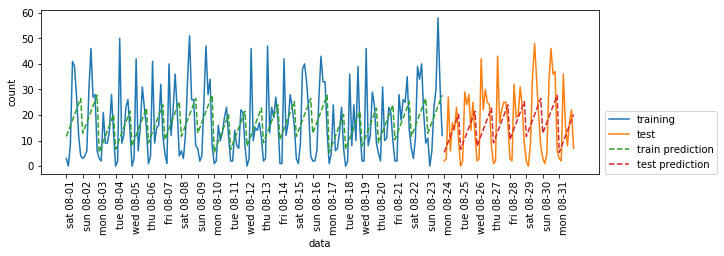

In [92]:
## 좀더 간단하게, 선형 모델로 해보기

from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

범주형 자료에 대해서 제대로 해석을 못했기 때문에 원핫인코딩을 진행

In [93]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

테스트 세트 R^2: 0.62


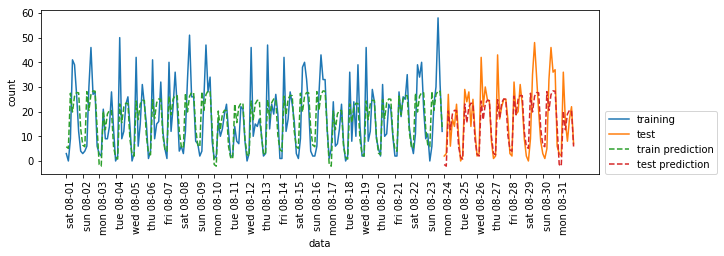

In [94]:
eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: 0.85


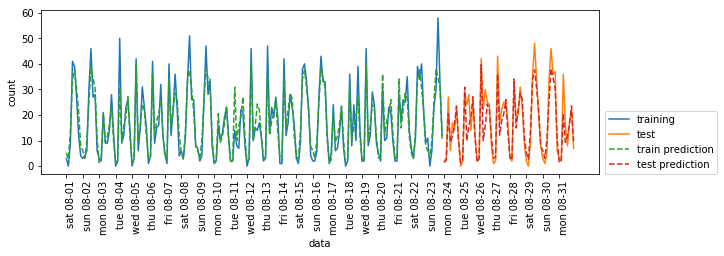

In [95]:
### 상호작용 특성 사용

poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [96]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
features =  day + hour

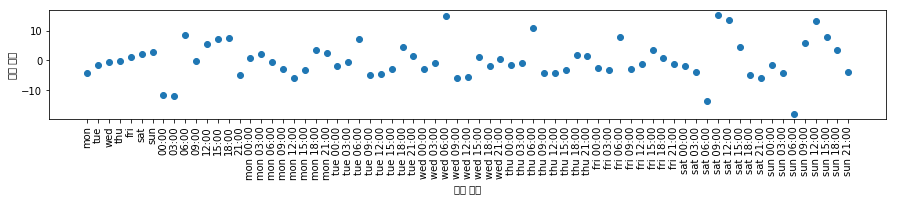

In [97]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

1. 시간과 요일 특성의 이름을 지음
2. 모든 상호작용 특성에 이름을 달음
3. 0이 아닌 특성만 선택 (lr.coef !=0)
4. 선형 모델로 표기